In [1]:
%matplotlib inline

In this notebook, we demonstrate a basic example using mesh movement driven by solutions of a Monge-Ampère type equation.

The idea is to consider two domains: the *physical domain* $\Omega_P$ and the *computational domain* $\Omega_C$. Associated with these are the *physical mesh* $\mathcal H_P$ and the *computational mesh* $\mathcal H_C$. The computational domain and mesh remain fixed throughout the simulation, whereas the physical domain and physical mesh are allowed to change. In this framework, we can interpret mesh movement algorithms as searches for mappings between the computational and physical domains:

$$\mathbf x:\Omega_C\rightarrow\Omega_P.$$

In practice we are really searching for a discrete mapping between the computational and physical meshes.

Let $\boldsymbol\xi$ and $\mathbf x$ denote the coordinate fields in the computational and physical domains. Skipping some of the details that can be found in [McRae et al. 2018], we choose that the mapping takes the form,

$$\mathbf x=\boldsymbol\xi+\nabla_{\boldsymbol\xi}\phi,$$

where $\phi$ is a convex potential function. Further, we choose that the potential is the solution of the Monge-Ampère type equation,

$$m(\mathbf x)\:\mathrm{det}(\underline{\mathbf I}+\nabla_{\boldsymbol\xi}\nabla_{\boldsymbol\xi}\phi)=\theta,$$

where $m(\mathbf x)$ is a so-called *monitor function* and $\theta$ is a positive normalisation function. The monitor function is of key importance, as it governs the "density" of the adapted mesh across the domain, i.e. where resolution is focused. 


[McRae et al. 2018] *A. T. T. McRae, C. J. Cotter, C. J. Budd, Optimal-transport-based mesh adaptivity on the plane and sphere using finite elements, SIAM Journal on Scientific Computing 40 (2) (2018) 1121–1148. doi:10.1137/16M1109515.*

In [2]:
from firedrake import *
from movement import *

In [3]:
from plotting import *

Let's start with a uniform mesh of the unit square.

In [4]:
n = 20
mesh = UnitSquareMesh(n, n)

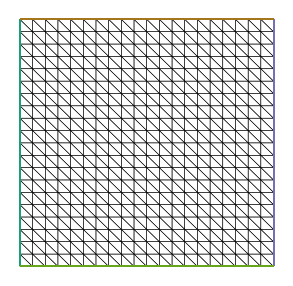

In [5]:
fig, axes, tp = plot_mesh(mesh);

Let's choose a monitor function which focuses mesh density in a ring centred within the domain, according to the formula,

$$m(x, y)=1+\frac\alpha{\mathrm{cosh}^2\left(\beta\left(\left(x-\frac12\right)^2+\left(y-\frac12\right)^2-\gamma\right)\right)},$$

for some values of the parameters $\alpha$, $\beta$ and $\gamma$. Unity is added at the start to ensure that the monitor function doesn't get too close to zero.

In [6]:
def ring_monitor(mesh):
    alpha = Constant(20.0)  # amplitude
    beta = Constant(200.0)  # width
    gamma = Constant(0.15)  # radius
    x, y = SpatialCoordinate(mesh)
    r = (x - 0.5)**2 + (y - 0.5)**2
    return Constant(1.0) + alpha/cosh(beta*(r - gamma))**2

With an initial mesh and a monitor function, we are able to construct a ``MongeAmpereMover`` instance and adapt the mesh.

In [7]:
mover = MongeAmpereMover(mesh, ring_monitor, method="quasi_newton")
mover.move();

   0   Min/Max 8.7054e-02   Residual 9.3894e-01   Equidistribution 9.8574e-01
   1   Min/Max 1.2021e-01   Residual 5.3472e-01   Equidistribution 9.9132e-01
   2   Min/Max 1.7411e-01   Residual 3.8291e-01   Equidistribution 9.9400e-01
   3   Min/Max 1.4578e-01   Residual 3.0577e-01   Equidistribution 9.9295e-01
   4   Min/Max 1.6927e-01   Residual 2.6870e-01   Equidistribution 9.9420e-01
   5   Min/Max 1.1931e-01   Residual 2.2172e-01   Equidistribution 9.9375e-01
   6   Min/Max 1.3618e-01   Residual 2.1441e-01   Equidistribution 9.9415e-01
   7   Min/Max 1.3029e-01   Residual 2.0290e-01   Equidistribution 9.9444e-01
   8   Min/Max 1.2604e-01   Residual 1.8357e-01   Equidistribution 9.9463e-01
   9   Min/Max 1.2806e-01   Residual 1.8599e-01   Equidistribution 9.9455e-01
  10   Min/Max 1.3158e-01   Residual 1.9708e-01   Equidistribution 9.9415e-01
  11   Min/Max 1.2512e-01   Residual 2.1334e-01   Equidistribution 9.9332e-01
  12   Min/Max 1.2165e-01   Residual 2.1998e-01   Equidistributi

As expected, the result is a mesh whose resolution is focused around a ring.

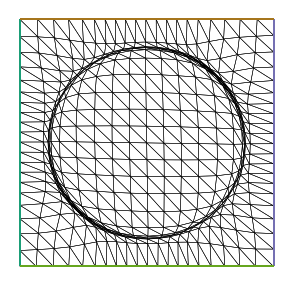

In [8]:
plot_mesh(mover.mesh);